In [29]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv, NNConv, global_mean_pool, TopKPooling
from torch_geometric.nn.glob import GlobalAttention
from torch_geometric.data import Data,DataLoader
# from torch.utils.data import DataLoader, TensorDataset
# from torch_geometric.loader import DataLoader
import torch.nn.functional as F
from torch_geometric.utils.convert import from_scipy_sparse_matrix
from torch_geometric.utils.convert import from_networkx
from torch_geometric.nn import GCNConv, global_mean_pool, BatchNorm
from torch_geometric.data import DataLoader
from torch.optim.lr_scheduler import StepLR
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip
from torch_geometric.utils import add_self_loops

from scipy import sparse

# load pickle module
import pickle
import networkx as nx
import torch.nn as nn

from tqdm import tqdm 

In [3]:
## remove the conv layers, relu--> linear regression works
## remove the edge index to see if the graph is helping
## r values which have never see before 

In [30]:
# R0 = 2.5
# R0 = 1.5
R0 = 1.5
R0char = {1.5:'1d5',2.5:'2d5',5.5:'5d5'}
rs = np.array([10, 2.0, 1.0, 0.5, 0.2, 0.1, 0.05, 0.025, 5.,  2.5  , 3.333,  1.333,  0.667,  0.286,  0.133,
        0.067,  0.033, 0.37,7.4,20  , 13.333]) ##20   13.333, 

In [16]:
np.log(rs)

array([ 2.30258509,  0.69314718,  0.        , -0.69314718, -1.60943791,
       -2.30258509, -2.99573227, -3.68887945,  1.60943791,  0.91629073,
        1.2038728 ,  0.28743204, -0.40496523, -1.25176347, -2.01740615,
       -2.70306266, -3.41124772, -0.99425227,  2.00148   ])

In [31]:
rs.sort()

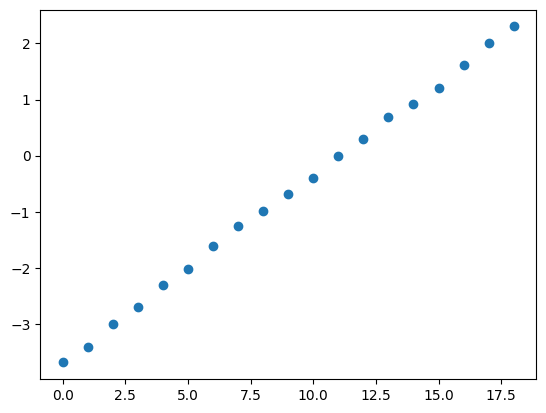

In [19]:
plt.scatter(range(19),np.log(rs))
# plt.axhline(2)
# plt.axhline(-2.8)

In [32]:
WN = np.loadtxt('../W_avg.csv') ### numpy arrary
# WN2 = np.dot(WN, WN)
# # prob = WN[:,1858]
# prob = WN2[:,1858]
# prob_2d = prob.reshape(-1,1)

In [33]:
g_s = nx.from_numpy_array(WN)
edges = np.array(g_s.edges()).transpose()
edge_index = torch.tensor(edges,dtype = torch.int64)
# edge_weight = torch.tensor(WN[edge_index[0], edge_index[1]], dtype=torch.float)
edge_weights = []
for (u, v) in g_s.edges():
    edge_weights.append([g_s[u][v]['weight']])
edge_weights = torch.tensor(edge_weights, dtype=torch.float32)

In [34]:
def load_gzipped_numpy(filename):
    try:
        with gzip.open(filename, 'rb') as f:
            return np.load(f, allow_pickle=True)
    except FileNotFoundError:
        return [0]

In [35]:
r_class = {20:0, 10:0, 2.0:1, 1.0:1, 0.5:1, 0.2:2, 0.1:2, 0.05:3, 0.025:3, 
           5.0:0 ,  2.5:1  , 13.333:0,  3.333:1,  1.333:1,  0.667:1,  0.286:2,  0.133:2,
        0.067:3,  0.033:3, 0.37:2,7.4:0}

In [36]:
main_dir = '/Users/qingyao/../../Volumes/Seagate_Qing/'
sub_dir = 'branching_data/simulation/python_cutoff_addno/'
export_dir = main_dir + sub_dir

In [37]:
def prepare_dataset(export_dir, R0, rs, t_len, edge_index, edge_weights):
    dataset = []
    t = int(10+t_len)
    print(t, R0, type(t))
    for r_idx in range(len(rs)):
        r = rs[r_idx]
        sub_export_dir = export_dir+'branching_R0-{}_r-{}/'.format(np.round(R0,2),np.round(r,3))
#         r_c = r_class[r]
        print(r)

        for g_idx in range(300):
            export_names = sub_export_dir+'NewInf_R0-{}_r-{}_{}.npy.gz'.format(np.round(R0,2),np.round(r,3),(g_idx+1))
            g_i = load_gzipped_numpy(export_names)
            
            g_i_new = g_i[:,10:t]

            matrix = torch.from_numpy(g_i_new)
            y = torch.log(torch.tensor([[r]], dtype=torch.float))
            data = Data(x=matrix, edge_index=edge_index, edge_attr=edge_weights, y=y)
            data.x = data.x.float()
            dataset.append(data)
    print('finish reading ^______^')
    return dataset

In [38]:
save_dir = main_dir +'branching_data/gnn_regression_{}/'.format(R0char[R0])
for sep in [50,42,35,28,21,14,7]:
    print(sep)
    dataset = prepare_dataset(export_dir, R0, rs, sep, edge_index, edge_weights)
    torch.save(dataset, save_dir+'dataset_{}.pt'.format(sep))

50
60 1.5 <class 'int'>
0.025
0.033
0.05
0.067
0.1
0.133
0.2
0.286
0.37
0.5
0.667
1.0
1.333
2.0
2.5
3.333
5.0
7.4
10.0
finish reading ^______^
42
52 1.5 <class 'int'>
0.025
0.033
0.05
0.067
0.1
0.133
0.2
0.286
0.37
0.5
0.667
1.0
1.333
2.0
2.5
3.333
5.0
7.4
10.0
finish reading ^______^
35
45 1.5 <class 'int'>
0.025
0.033
0.05
0.067
0.1
0.133
0.2
0.286
0.37
0.5
0.667
1.0
1.333
2.0
2.5
3.333
5.0
7.4
10.0
finish reading ^______^
28
38 1.5 <class 'int'>
0.025
0.033
0.05
0.067
0.1
0.133
0.2
0.286
0.37
0.5
0.667
1.0
1.333
2.0
2.5
3.333
5.0
7.4
10.0
finish reading ^______^
21
31 1.5 <class 'int'>
0.025
0.033
0.05
0.067
0.1
0.133
0.2
0.286
0.37
0.5
0.667
1.0
1.333
2.0
2.5
3.333
5.0
7.4
10.0
finish reading ^______^
14
24 1.5 <class 'int'>
0.025
0.033
0.05
0.067
0.1
0.133
0.2
0.286
0.37
0.5
0.667
1.0
1.333
2.0
2.5
3.333
5.0
7.4
10.0
finish reading ^______^
7
17 1.5 <class 'int'>
0.025
0.033
0.05
0.067
0.1
0.133
0.2
0.286
0.37
0.5
0.667
1.0
1.333
2.0
2.5
3.333
5.0
7.4
10.0
finish reading ^______^


In [40]:
# torch.save(dataset, 'dataset_50.pt')
test = torch.load('dataset_50.pt')

In [49]:
def datasets_are_equal(dataset1, dataset2):
    if len(dataset1) != len(dataset2):
        return False

    for data1, data2 in zip(dataset1, dataset2):
        if not torch.all(data1.x == data2.x):
            return False
        if not torch.all(data1.edge_index == data2.edge_index):
            return False
        if data1.edge_attr is not None and data2.edge_attr is not None:
            if not torch.all(data1.edge_attr == data2.edge_attr):
                return False
        if not torch.all(data1.y == data2.y):
            return False
        # Add similar checks for any other attributes present in your Data objects

    return True

datasets_are_equal(dataset, test)

True

In [47]:
lr_list = [np.power(0.5, i) for i in range(2, 16, 2)]*10

In [46]:
# Generate PBS script
def generate_pbs_script(num_x, layer, R0, with_g, filename):
    script = f"""\
#PBS -l walltime=70:00:00
#PBS -l select=1:ncpus=1:mem=16gb
#PBS -J 1-700

module load anaconda3/personal
source activate motifenv

cd $HOME/branching_superspreading/
python3 NN_Regression.py $PBS_ARRAY_INDEX {num_x} {layer} {R0} {with_g}
"""
    with open(filename, 'w') as f:
        f.write(script)

# Define parameters
# parameters = range(0, 10)  # Replace this with the range of parameters you want
for layer in [4]:
    sep = 50
    R0 = '5d5'
    with_g = 0 ### without graph
#     for sep in range(7,49,7):
    filename = f"layer{layer}_x-{sep}_{R0}_g-{with_g}.pbs"  # Name the file related to the parameter
    generate_pbs_script(sep, layer, R0, with_g, filename)

In [44]:
hidden_channels = [128,64,16,8]

In [45]:
num_hidden_layers = 4
m_num_layers = max(num_hidden_layers, 0)  # Ensure non-negative layer count

# If there are no layers, use a one-layer perceptron
if m_num_layers == 0:
    print('self.fc = torch.nn.Linear(num_node_features, 1)')
else:
    print('self.convs.append(GCNConv(num_node_features, {})'.format(hidden_channels[0])) 
    for i in range(1, m_num_layers):
        print(hidden_channels[i-1], hidden_channels[i])
#         self.convs.append(
#             GCNConv(hidden_channels[i-1], hidden_channels[i]))

    # Define the fully connected layer
    print('the final fc:', hidden_channels[m_num_layers-1], 1)
#     self.fc = torch.nn.Linear(hidden_channels[i-1], 1)

self.convs.append(GCNConv(num_node_features, 128)
128 64
64 16
16 8
the final fc: 8 1
